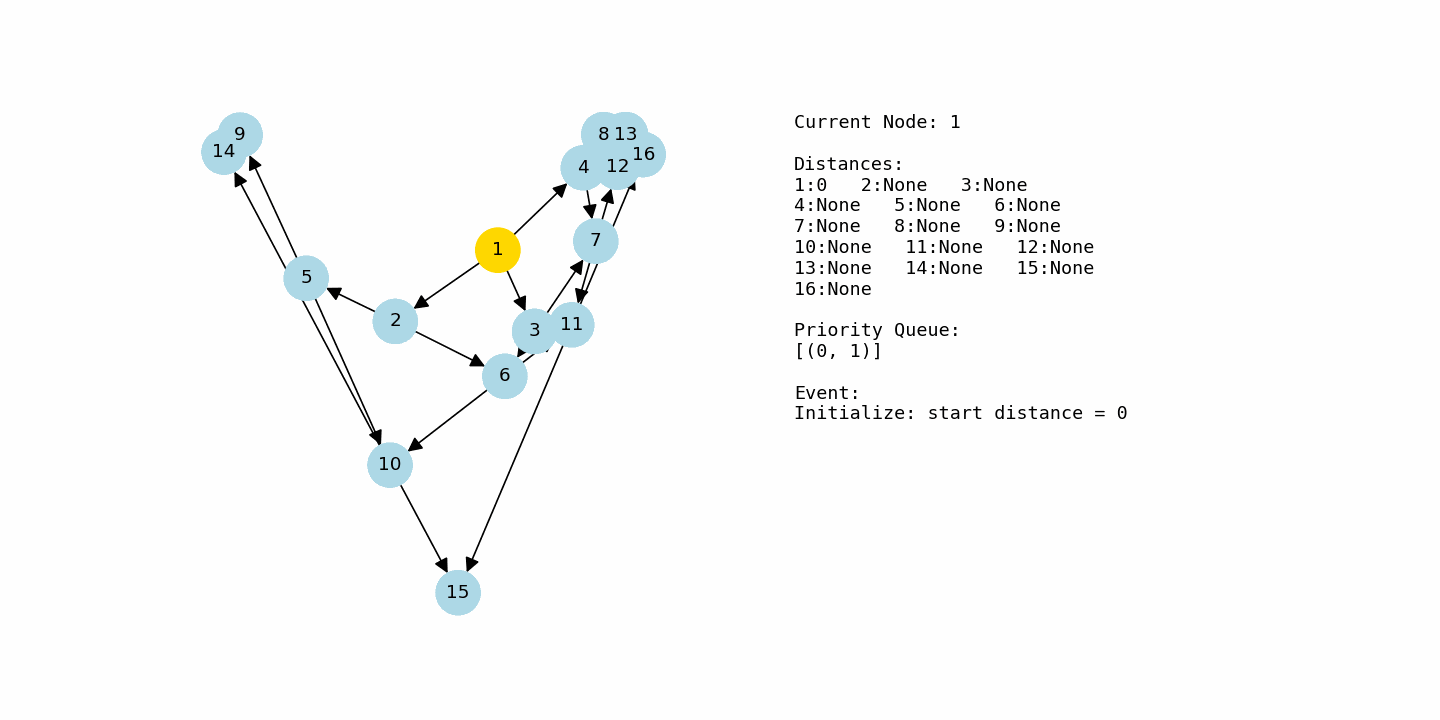

In [132]:
import heapq

def dijkstra(graph, start):

    # STEP 1: Initialize distances
    distances = {node: float("inf") for node in graph}
    distances[start] = 0

    # STEP 2: Priority queue always gives the closest node not yet processed
    pq = [(0, start)]

    # STEP 3: Main processing loop
    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if this entry is outdated
        if current_distance > distances[current_node]:
            continue

        # STEP 4: Explore all neighbors
        for neighbor, weight in graph[current_node]:
            new_distance = current_distance + weight

            # STEP 5: Relaxation step
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(pq, (new_distance, neighbor))

    # STEP 6: Final distance table
    return distances

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import os


def dijkstra_with_gif(graph, start, gif_name, frame_duration=1500):
    distances = {node: float("inf") for node in graph.nodes()}
    distances[start] = 0

    pq = [(0, start)]
    visited = set()
    frames = []

    pos = nx.spring_layout(graph, seed=42)

    def fmt(d):
        return {k: (None if v == float("inf") else v) for k, v in d.items()}

    # Helper to format PQ
    def format_pq(pq_list):
        return [(d, n) for d, n in pq_list]

    def capture(highlight=None, note=""):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        colors = []
        for n in graph.nodes():
            if n == highlight:
                colors.append("gold")
            elif n in visited:
                colors.append("lightgreen")
            else:
                colors.append("lightblue")

        nx.draw(
            graph, pos,
            with_labels=True,
            node_color=colors,
            node_size=700,
            arrowsize=18,
            font_size=11
        )
        plt.subplot(1, 2, 2)
        plt.axis("off")

        raw = fmt(distances)
        dist_items = list(raw.items())
        dist_lines = []
        line = ""

        for i, (node, dist) in enumerate(dist_items, 1):
            line += f"{node}:{dist}   "
            if i % 3 == 0:
                dist_lines.append(line)
                line = ""
        if line:  # leftover
            dist_lines.append(line)

        dist_text = "\n".join(dist_lines)

        # Build final text block
        text = (
            f"Current Node: {highlight}\n\n"
            f"Distances:\n{dist_text}\n\n"
            f"Priority Queue:\n{format_pq(pq)}\n\n"
            f"Event:\n{note}"
        )

        plt.text(0.01, 0.95, text,
                 va='top', fontsize=11, family="monospace")

        # Save frame (fixed DPI = fixed size)
        filename = f"frame_{len(frames)}.png"
        plt.savefig(filename, dpi=120)
        plt.close()
        frames.append(filename)

    capture(start, "Initialize: start distance = 0")

    while pq:
        dist, node = heapq.heappop(pq)

        if node in visited:
            capture(node, "Skip: already visited.")
            continue

        visited.add(node)
        capture(node, "Visit node and finalize its shortest distance.")

        for neighbor in graph.neighbors(node):
            w = graph[node][neighbor]["weight"]
            new_dist = dist + w

            if new_dist < distances[neighbor]:
                old = distances[neighbor]
                distances[neighbor] = new_dist
                heapq.heappush(pq, (new_dist, neighbor))

                note = (
                    f"Relax edge {node} → {neighbor}\n"
                    f"Old distance: {old}\n"
                    f"New distance: {new_dist}"
                )
                capture(neighbor, note)
            else:
                note = (
                    f"No improvement via {node} → {neighbor}\n"
                    f"Current best: {distances[neighbor]}\n"
                    f"Candidate: {new_dist}"
                )
                capture(neighbor, note)

    images = [imageio.imread(f) for f in frames]
    imageio.mimsave(gif_name, images, duration=frame_duration, loop=0)

    # Clean up temporary frames
    for f in frames:
        os.remove(f)

    return distances

In [134]:
G1 = nx.DiGraph()
G1.add_weighted_edges_from([
    ("A", "B", 4),
    ("A", "C", 1),
    ("C", "B", 2),
    ("B", "D", 5),
    ("C", "D", 8),
    ("D", "E", 6)
])

dijkstra_with_gif(G1, "A", "example1.gif")

/var/folders/rv/hd876kss68148qrgkftj79l80000gn/T/ipykernel_62857/2466785497.py:120: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in frames]


{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}

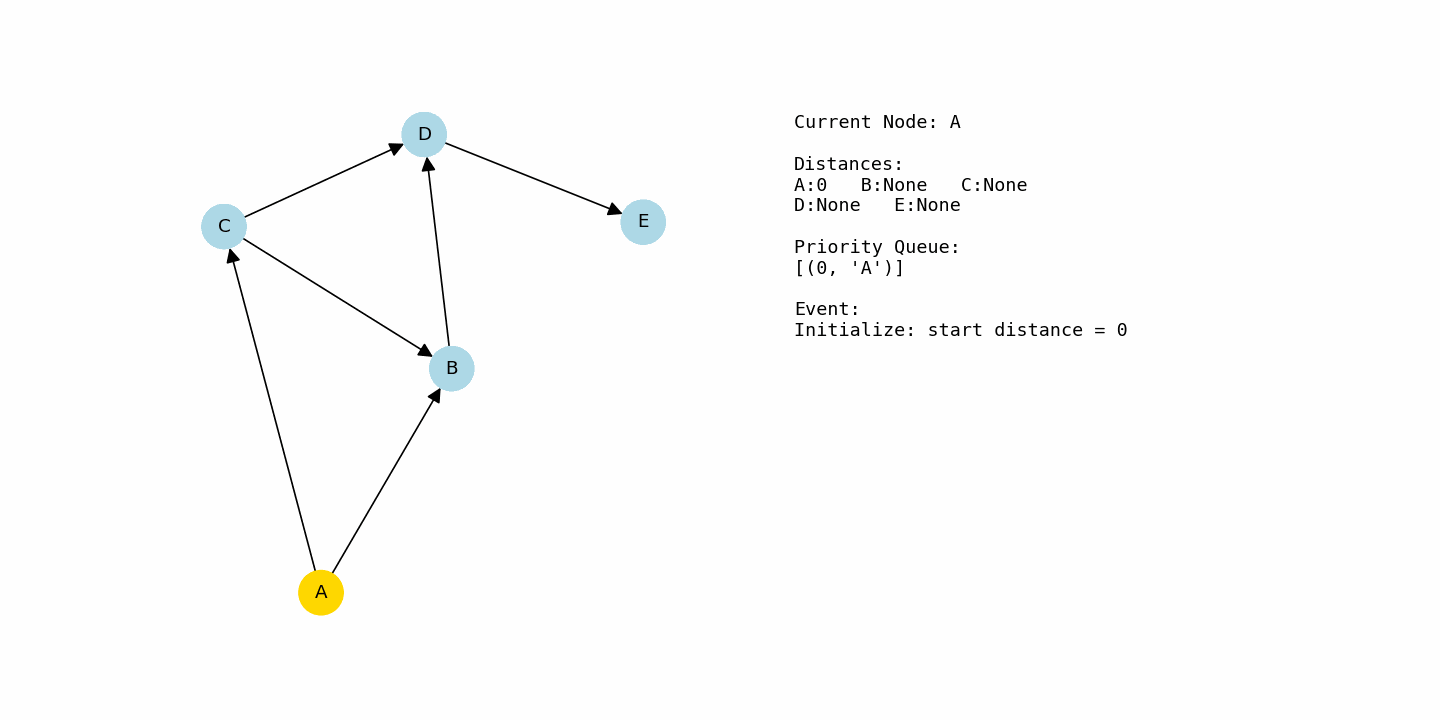

In [135]:
G2 = nx.DiGraph()
G2.add_weighted_edges_from([
    (1, 2, 2), (1, 3, 4), (1, 4, 1),

    (2, 5, 3), (2, 6, 2),
    (3, 6, 1), (3, 7, 5),
    (4, 7, 2), (4, 8, 4),

    (5, 9, 4),
    (6, 9, 1), (6, 10, 5),
    (7, 10, 2),
    (8, 10, 3)
])

dijkstra_with_gif(G2, 1, "example2_medium.gif")

/var/folders/rv/hd876kss68148qrgkftj79l80000gn/T/ipykernel_62857/2466785497.py:120: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in frames]


{1: 0, 2: 2, 3: 4, 4: 1, 5: 5, 6: 4, 7: 3, 8: 5, 9: 5, 10: 5}

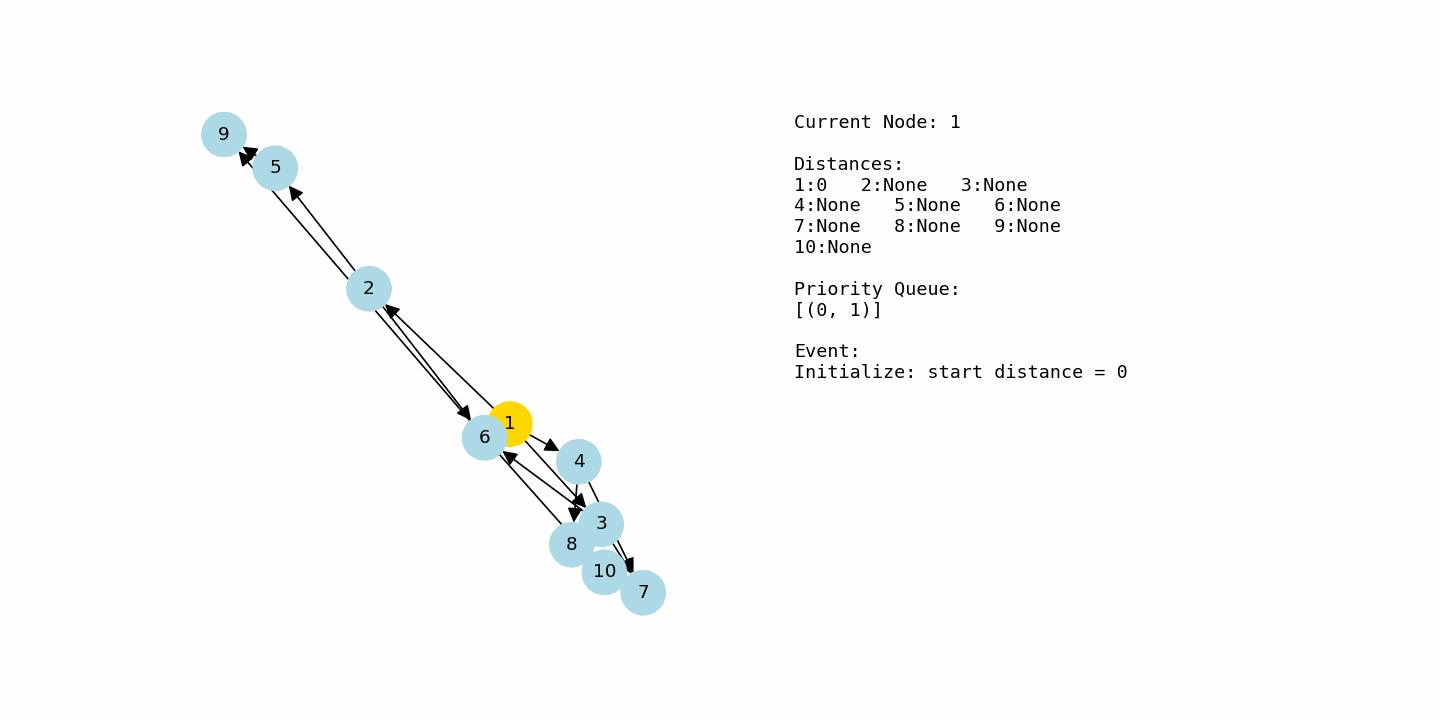

In [136]:
G3 = nx.DiGraph()

G3.add_weighted_edges_from([
    (1, 2, 4), (1, 3, 2), (1, 4, 5),

    (2, 5, 3), (2, 6, 2),
    (3, 6, 4), (3, 7, 1),
    (4, 7, 2), (4, 8, 6),

    (5, 9, 5), (5, 10, 3),
    (6, 10, 2), (6, 11, 6),
    (7, 11, 3), (7, 12, 4),
    (8, 12, 2), (8, 13, 7),

    (9, 14, 3),
    (10, 14, 1), (10, 15, 6),
    (11, 15, 2), (11, 16, 5),
    (12, 16, 3),
    (13, 16, 4)
])

dijkstra_with_gif(G3, 1, "example3_large.gif")

/var/folders/rv/hd876kss68148qrgkftj79l80000gn/T/ipykernel_62857/2466785497.py:120: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in frames]


{1: 0,
 2: 4,
 3: 2,
 4: 5,
 5: 7,
 6: 6,
 7: 3,
 8: 11,
 9: 12,
 10: 8,
 11: 6,
 12: 7,
 13: 18,
 14: 9,
 15: 8,
 16: 10}